In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CancerName = "THYM"
SymbolName = "mRNA"

In [3]:
all_c_index = pd.read_csv("Result/%s-%s-CIndex.csv" % (CancerName, SymbolName), header=0)

In [4]:
all_c_index.head()

ModelName  C-index Train  C-index Test
0        coxnet       1.000000      0.652174
1          cgbs       0.983380      0.652174
2           gbs       1.000000      0.456522
3  fksvm_linear       0.922438      0.739130
4    fksvm_poly       1.000000      0.826087

In [5]:
group_c_index = all_c_index.groupby("ModelName")

In [6]:
boxplot_data = {
    "train": [],
    "test": [],
    "labels": [],
}
mean_c_index = pd.DataFrame(columns=["ModelName", "Median C-index Train", "Median C-index Test"])

In [7]:
for name, group in group_c_index:
    row = {
        "ModelName": name,
        "Median C-index Train": group.describe().loc["50%"]["C-index Train"],
        "Median C-index Test": group.describe().loc["50%"]["C-index Test"],
    }
    mean_c_index = mean_c_index.append(row, ignore_index=True)
    boxplot_data["train"].append(group["C-index Train"])
    boxplot_data["test"].append(group["C-index Test"])
    boxplot_data["labels"].append(name)

In [8]:
mean_c_index

ModelName  Median C-index Train  Median C-index Test
0           cgbs              0.991306             0.803226
1         coxnet              1.000000             0.912879
2   fksvm_cosine              1.000000             0.961538
3   fksvm_linear              0.871004             0.866169
4     fksvm_poly              1.000000             0.923077
5      fksvm_rbf              1.000000             0.882606
6           fsvm              1.000000             0.947222
7            gbs              1.000000             0.700000
8     stacking_a              0.960732             0.770979
9    tony_conv1d              1.000000             0.937500
10    tony_nn_v1              1.000000             0.933333
11    tony_nn_v2              1.000000             0.950957
12      xgb_surv              0.943978             0.958333

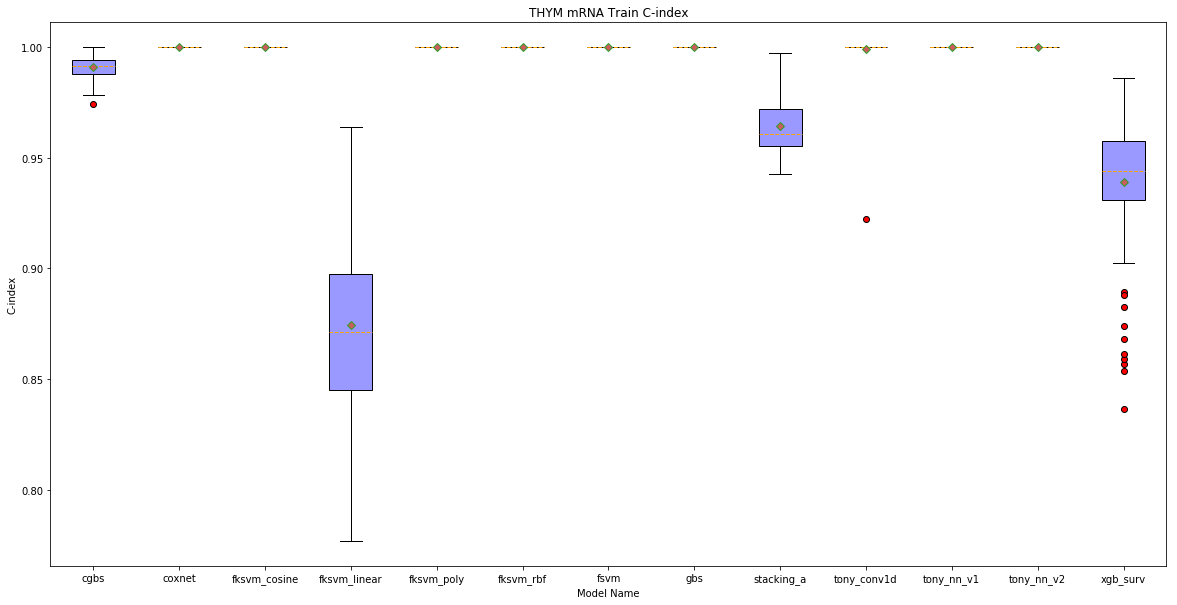

In [9]:
plt.figure(figsize=(20, 10));
plt.title('%s %s Train C-index' % (CancerName, SymbolName))
plt.xlabel('Model Name')
plt.ylabel('C-index')
plt.boxplot(
    x = boxplot_data["train"],
    patch_artist=True,
    labels = boxplot_data["labels"],
    showmeans=True,
    boxprops = {'color':'black','facecolor':'#9999ff'},
    flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
    meanprops = {'marker':'D','markerfacecolor':'indianred'},
    medianprops = {'linestyle':'--','color':'orange'}
)
plt.savefig('%s_%s_Train_BoxPlot.png' % (CancerName, SymbolName))

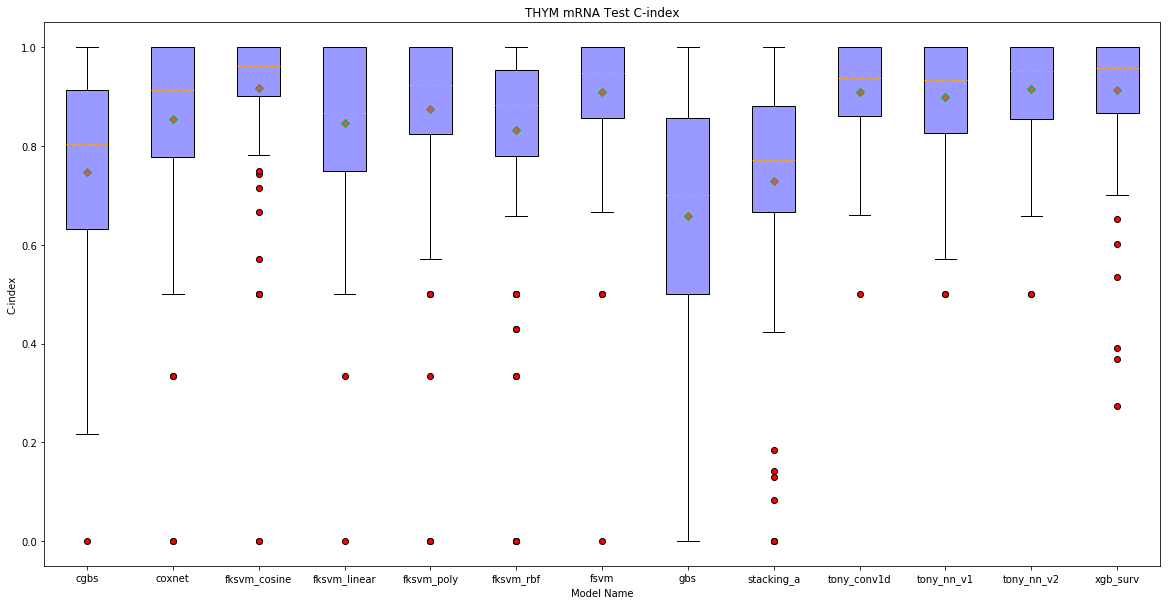

In [10]:
plt.figure(figsize=(20, 10));
plt.title('%s %s Test C-index' % (CancerName, SymbolName))
plt.xlabel('Model Name')
plt.ylabel('C-index')
plt.boxplot(
    x = boxplot_data["test"],
    patch_artist=True,
    labels = boxplot_data["labels"],
    showmeans=True,
    boxprops = {'color':'black','facecolor':'#9999ff'},
    flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
    meanprops = {'marker':'D','markerfacecolor':'indianred'},
    medianprops = {'linestyle':'--','color':'orange'}
)
plt.savefig('%s_%s_Test_BoxPlot.png' % (CancerName, SymbolName))